# Analysing Theta Matrices
*Anastasia Nikiforova. HSE, Computational Linguistics*

*Thesis: Metaphor Identification using Topic Modeling*
____

In this notebook, finding out which topics prevail in MET and NONMET classes, and whether there is a difference at all.

As an example, we'll take LDA, ARTM-sparse and ARTM-dense 80/40 topic distributions in Metaphor corpus (Badryzlova, 2019).

In [1]:
import pandas as pd

In [338]:
theta_df_1 = pd.read_csv('./artm/thetas/metcorp_tm_lda80.csv', index_col=None)
theta_df_2 = pd.read_csv('./artm/thetas/metcorp_tm_sparse80.csv', index_col=None)
theta_df_3 = pd.read_csv('./artm/thetas/metcorp_tm_dense_280.csv', index_col=None)

# theta_df_1 = pd.read_csv('./artm/thetas/metcorp_tm_lda40.csv', index_col=None)
# theta_df_2 = pd.read_csv('./artm/thetas/metcorp_tm_sparse40.csv', index_col=None)
# theta_df_3 = pd.read_csv('./artm/thetas/metcorp_tm_dense_240.csv', index_col=None)

# theta_df_1 = pd.read_csv('./artm/thetas/metcorp_tm_lda60.csv', index_col=None)
# theta_df_2 = pd.read_csv('./artm/thetas/metcorp_tm_sparse60.csv', index_col=None)
# theta_df_3 = pd.read_csv('./artm/thetas/metcorp_tm_dense_260.csv', index_col=None)

# theta_df_1 = pd.read_csv('./artm/thetas/metcorp_tm_lda100.csv', index_col=None)
# theta_df_2 = pd.read_csv('./artm/thetas/metcorp_tm_sparse100.csv', index_col=None)
# theta_df_3 = pd.read_csv('./artm/thetas/metcorp_tm_dense_2100.csv', index_col=None)

In [299]:
theta_df_1.head()

,Unnamed: 0,sents,targets,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_70,topic_71,topic_72,topic_73,topic_74,topic_75,topic_76,topic_77,topic_78,topic_79
0,0,нужно_PRED весь_ADJF время_NOUN бомбардировать...,1,0.002206,0.001966,0.002182,0.001840,0.003801,0.002203,0.001750,...,0.002135,0.001820,0.001731,0.001752,0.002082,0.001752,0.001734,0.002213,0.001895,0.002743
1,1,добрынин_NOUN говорить_VERB шевченко_NOUN цент...,1,0.001103,0.000938,0.000929,0.000842,0.001356,0.002182,0.000854,...,0.000823,0.000811,0.001350,0.000857,0.001070,0.000894,0.000858,0.001027,0.001322,0.000791
2,2,принять_INFN внимание_NOUN настойчиво_ADVB гру...,1,0.000419,0.000443,0.000362,0.000379,0.040645,0.000999,0.000390,...,0.000373,0.000362,0.000347,0.000467,0.000614,0.000391,0.000364,0.000407,0.000385,0.000347
3,3,кроме_PREP покупка_NOUN рука_NOUN сохранять_VE...,1,0.000990,0.000654,0.000592,0.000586,0.087298,0.003615,0.000562,...,0.000544,0.002957,0.000556,0.000593,0.000649,0.000606,0.000867,0.000894,0.000783,0.000614
4,4,сигнал_NOUN настойчиво_ADVB бомбардировать_INF...,1,0.001075,0.001519,0.001097,0.001079,0.217203,0.001572,0.001212,...,0.001070,0.000963,0.000929,0.001966,0.001232,0.000991,0.000942,0.001786,0.001002,0.000926


In [496]:
theta_df_1['sents'][300]

'пасти_VERB загонять_VERB хлев_NOUN доить_INFN жиреть_VERB ток_NOUN идти_PRTF эмоция_NOUN точно_ADVB жиреть_VERB сок_NOUN выделять_PRTF корова_NOUN давать_VERB корма_NOUN содержимый_PRTF стимулятор_NOUN лактация_NOUN'

In [532]:
def get_topic_means(df, normalized=True):

    theta_df_met = df[df['targets']==1]
    theta_met_agg = theta_df_met.iloc[:,2:].groupby(['targets'], as_index=False).agg(['mean']).values

    theta_df_nonmet = df[df['targets']==0]
    theta_nonmet_agg = theta_df_nonmet.iloc[:,2:].groupby(['targets'], as_index=False).agg(['mean']).values
    
    if normalized:
        theta_met_agg = np.array([float(i)/sum(theta_met_agg[0]) for i in theta_met_agg[0]])
        theta_nonmet_agg = np.array([float(i)/sum(theta_nonmet_agg[0]) for i in theta_nonmet_agg[0]])
    
    return theta_met_agg, theta_nonmet_agg

def get_topic_values(df):

    theta_met = df[df['targets']==1].iloc[:,3:83].values
    theta_nonmet = df[df['targets']==0].iloc[:,3:83].values
    
    return theta_met, theta_nonmet

def get_sents(df):

    theta_met = df[df['targets']==1].iloc[:,0:3].reset_index()
    theta_nonmet = df[df['targets']==0].iloc[:,0:3].reset_index()
    
    return theta_met, theta_nonmet

In [339]:
theta_met_1, theta_nonmet_1 = get_topic_means(theta_df_1)
theta_met_2, theta_nonmet_2 = get_topic_means(theta_df_2)
theta_met_3, theta_nonmet_3 = get_topic_means(theta_df_3)

In [526]:
theta_values_met_1, theta_values_nonmet_1 = get_topic_values(theta_df_1)
theta_values_met_2, theta_values_nonmet_2 = get_topic_values(theta_df_2)
theta_values_met_3, theta_values_nonmet_3 = get_topic_values(theta_df_3)

In [533]:
sents_met, sents_nonmet = get_sents(theta_df_1)

In [697]:
sents_met['sents'][2150]

'удивление_NOUN видеть_VERB старое_NOUN академик_NOUN съедать_INFN страх_ADVB'

In [698]:
sents_nonmet['sents'][2150]

'например_CONJ количество_NOUN съедать_INFN день_NOUN калория_NOUN должный_ADJS превышать_INFN 1800_NUMR ежедневно_ADVB жир_NOUN большой_COMP сорок_NUMR грамм_NOUN строго_ADVB ограничить_INFN потребление_NOUN соль_NOUN специя_NOUN сладкое_NOUN'

In [243]:
import matplotlib.pyplot as plt

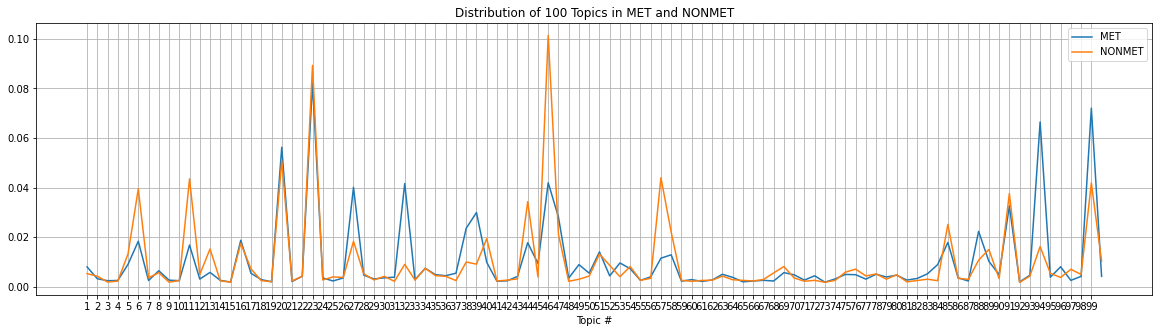

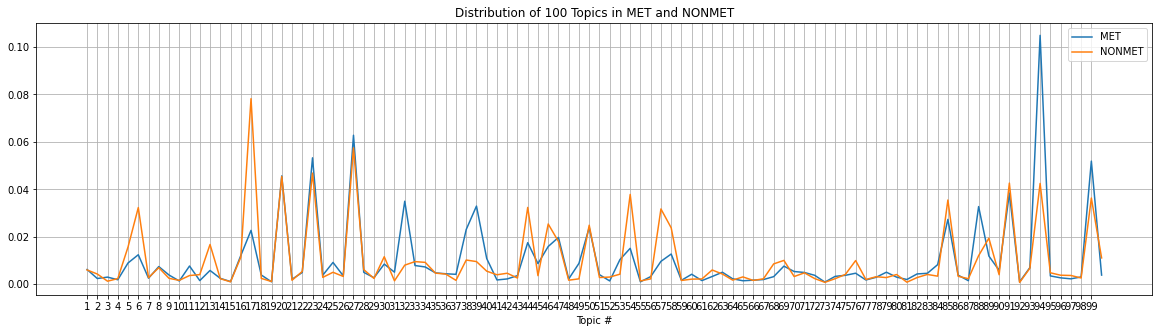

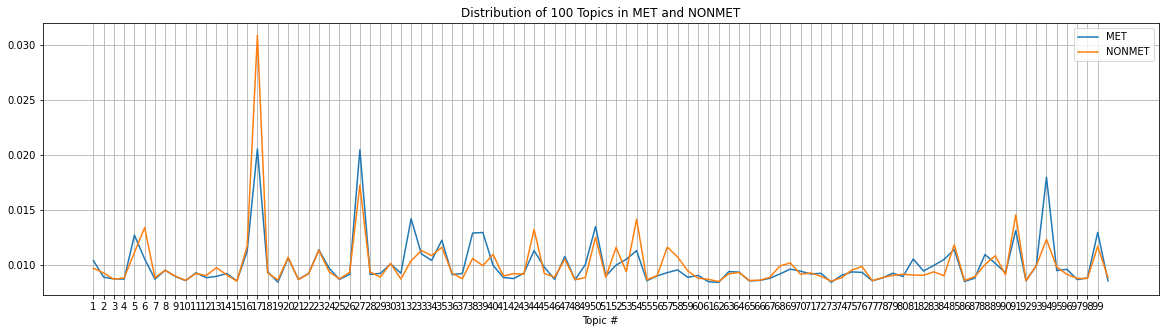

In [257]:
def plot_distribution(met, nonmet):
    fig = plt.figure(figsize=(20,5))

    plt.plot(met)
    plt.plot(nonmet)

    title = f"Distribution of {len(met)} Topics in MET and NONMET"
    plt.title(title)
    plt.xlabel('Topic #')
    #plt.ylabel('Percentage')

    topics = [i for i in range(1, len(met+1))]
    plt.xticks(list(range(len(topics))), topics)

    plt.legend(['MET', 'NONMET'], loc='best')
    plt.grid()
    plt.show()
    # plt.savefig(f"topic_distribution_artms_{len(theta_df_met_agg[0])}.png")\
    
plot_distribution(theta_met_1, theta_nonmet_1)
plot_distribution(theta_met_2, theta_nonmet_2)
plot_distribution(theta_met_3, theta_nonmet_3)

In [41]:
from scipy import stats

In [386]:
print(stats.ks_2samp(theta_met_1, theta_nonmet_1))
print(stats.ks_2samp(theta_met_2, theta_nonmet_2))
print(stats.ks_2samp(theta_met_3, theta_nonmet_3))

Ks_2sampResult(statistic=0.1125, pvalue=0.6953371976633547)
Ks_2sampResult(statistic=0.0625, pvalue=0.9979304754193015)
Ks_2sampResult(statistic=0.0875, pvalue=0.9219575000121607)


In [117]:
import matplotlib.pyplot as plt
import numpy as np

In [575]:
def tm_heatmap(met=[], nonmet=[], target_verb='', save_name='default'):
    # Create four polar axes and access them through the returned array
    plt.style.use('default')
    fig, axs = plt.subplots(3, 2, figsize=(8,7), sharex=True)
    fig.suptitle(f'Распределение тем, <<{target_verb}>>').set_y(1.003)  # , fontsize="large"
    axs[0, 0].set_title('MET')
    axs[0, 1].set_title('NONMET')
    
    axs[0, 0].set_ylabel('LDA')
    axs[0, 0].imshow(met[0].T, cmap='hot', interpolation='nearest')
    axs[0, 1].imshow(nonmet[0].T, cmap='hot', interpolation='nearest')
    
    axs[1, 0].set_ylabel('ARTM sparse')
    axs[1, 0].imshow(met[1].T, cmap='hot', interpolation='nearest')
    axs[1, 1].imshow(nonmet[1].T, cmap='hot', interpolation='nearest')
    
    axs[2, 0].set_ylabel('ARTM dense')
    axs[2, 0].imshow(met[2].T, cmap='hot', interpolation='nearest')
    axs[2, 1].imshow(nonmet[2].T, cmap='hot', interpolation='nearest')
    

    fig.savefig(f"./artm/img/{save_name}", bbox_inches='tight')
    plt.tight_layout()


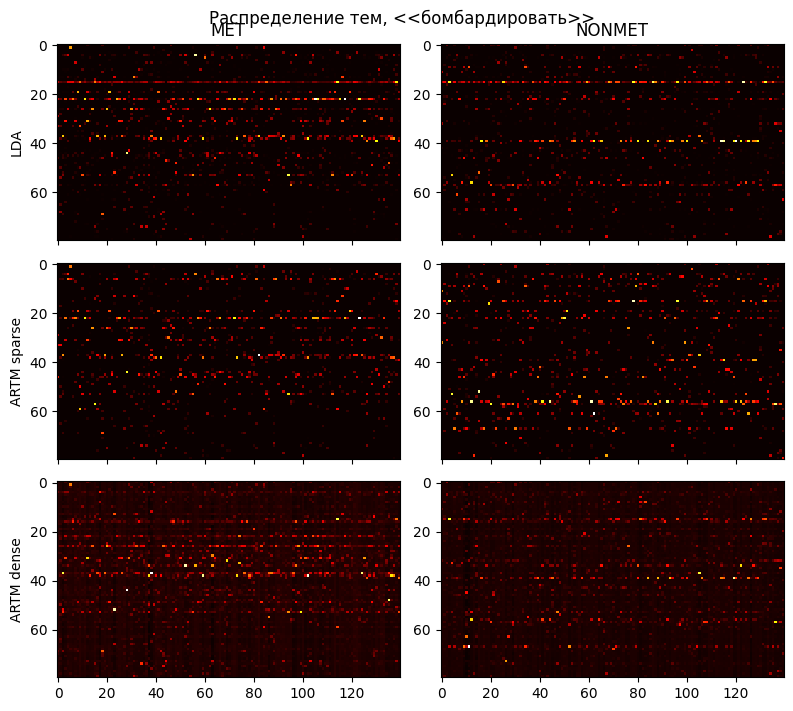

In [585]:
tm_heatmap(met=[theta_values_met_1[:140], theta_values_met_2[:140],theta_values_met_3[:140]],
           nonmet=[theta_values_nonmet_1[:140], theta_values_nonmet_2[:140], theta_values_nonmet_3[:140]],
           target_verb='бомбардировать', save_name='bombard.pdf'
          )

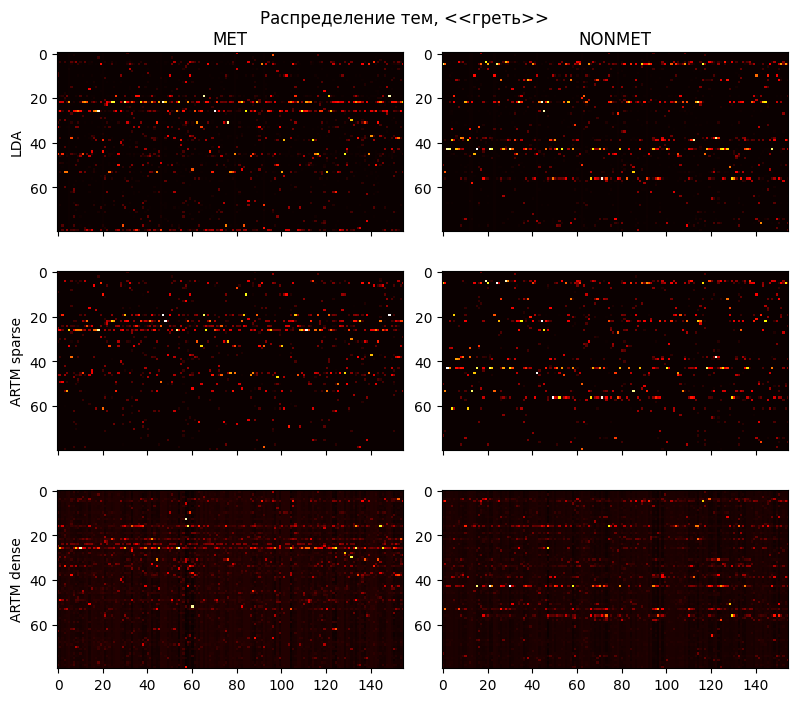

In [587]:
tm_heatmap(met=[theta_values_met_1[400:555], theta_values_met_2[400:555],theta_values_met_3[400:555]],
           nonmet=[theta_values_nonmet_1[400:555], theta_values_nonmet_2[400:555], theta_values_nonmet_3[400:555]],
           target_verb='греть', save_name='gret.pdf')

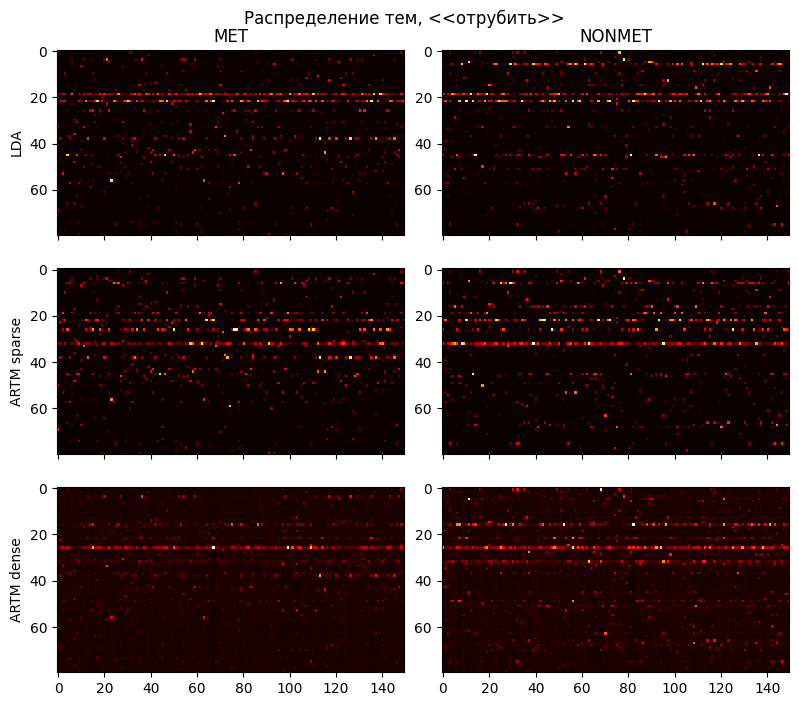

In [662]:
tm_heatmap(met=[theta_values_met_1[900:1050], theta_values_met_2[900:1050],theta_values_met_3[900:1050]],
           nonmet=[theta_values_nonmet_1[900:1050], theta_values_nonmet_2[900:1050], theta_values_nonmet_3[900:1050]],
           target_verb='отрубить', save_name='otrubit.pdf')

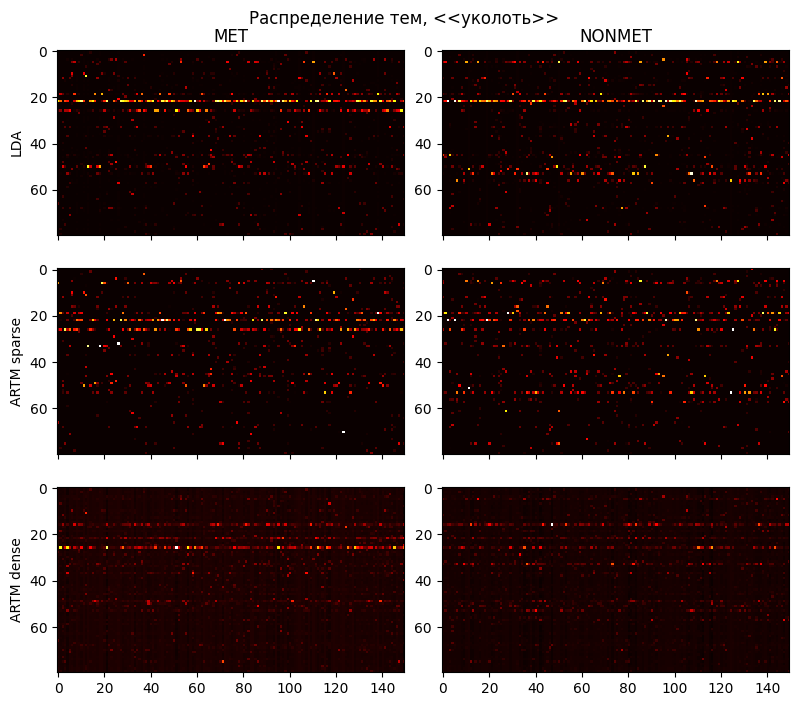

In [663]:
tm_heatmap(met=[theta_values_met_1[2450:2600], theta_values_met_2[2450:2600],theta_values_met_3[2450:2600]],
           nonmet=[theta_values_nonmet_1[2440:2590], theta_values_nonmet_2[2440:2590], theta_values_nonmet_3[2440:2590]],
           target_verb='уколоть', save_name='ukolot.pdf')

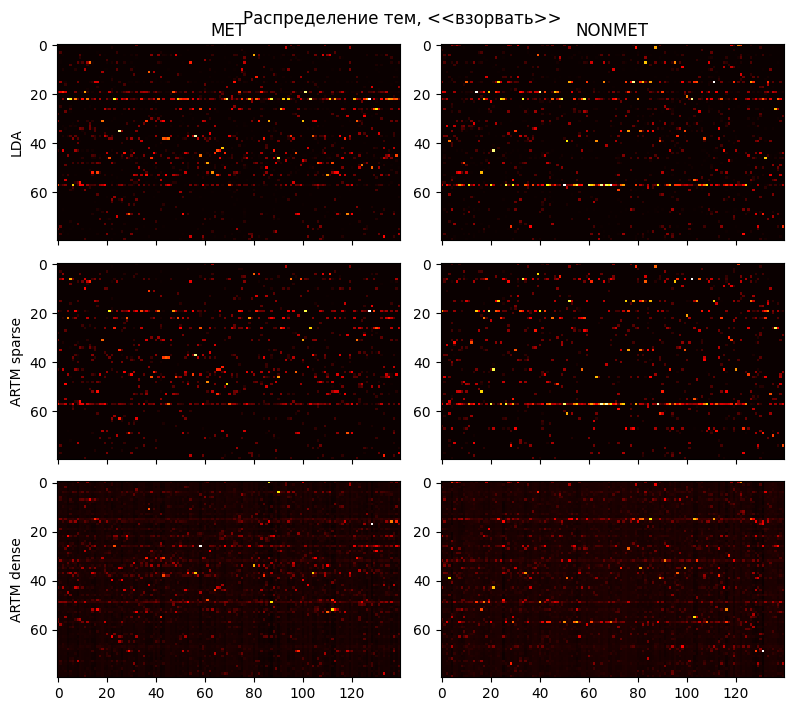

In [664]:
tm_heatmap(met=[theta_values_met_1[2910:3050], theta_values_met_2[2910:3050],theta_values_met_3[2910:3050]],
           nonmet=[theta_values_nonmet_1[2920:3060], theta_values_nonmet_2[2920:3060], theta_values_nonmet_3[2920:3060]],
           target_verb='взорвать', save_name='vzorvat.pdf')

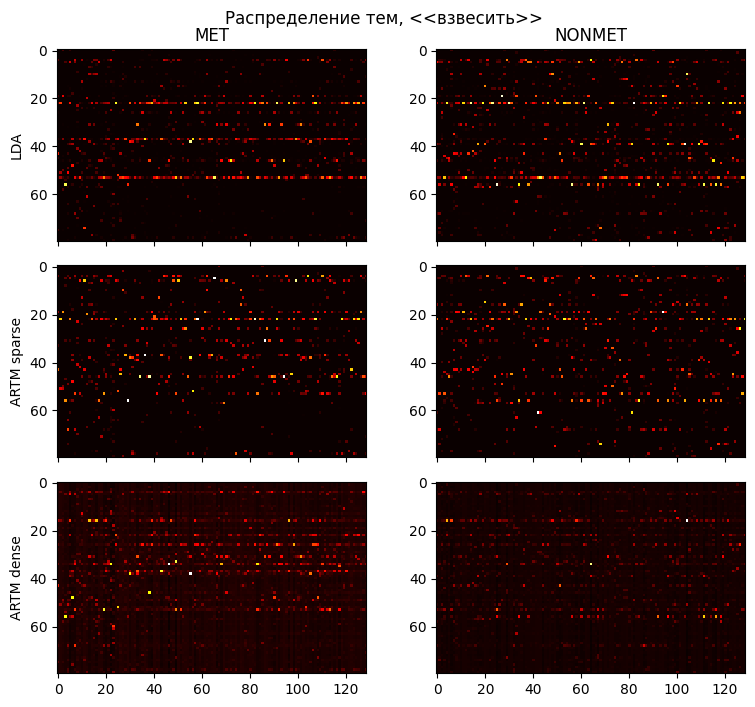

In [703]:
tm_heatmap(met=[theta_values_met_1[3051:3195], theta_values_met_2[3051:3195],theta_values_met_3[3051:3195]],
           nonmet=[theta_values_nonmet_1[3071:3200], theta_values_nonmet_2[3071:3200], theta_values_nonmet_3[3071:3200]],
           target_verb='взвесить', save_name='vzvesit.pdf')

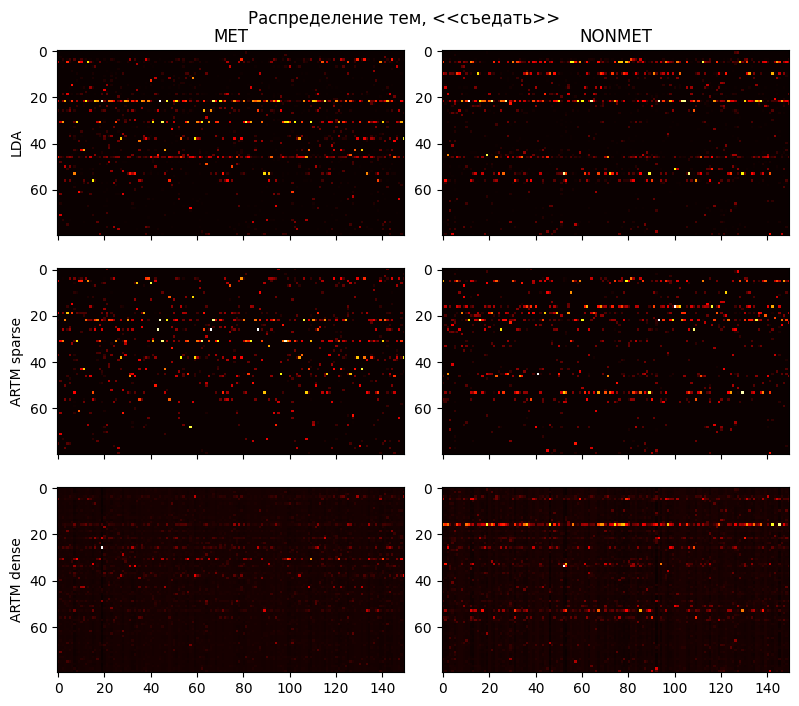

In [701]:
tm_heatmap(met=[theta_values_met_1[1950:2100], theta_values_met_2[1950:2100],theta_values_met_3[1950:2100]],
           nonmet=[theta_values_nonmet_1[1950:2100], theta_values_nonmet_2[1950:2100], theta_values_nonmet_3[1950:2100]],
           target_verb='съедать', save_name='sedat.pdf')